# Visualización de información con matplotlib

### **Ingeniería de datos**
**Profesor: Domagoj Vrgoč**

### Introducción

Durante esta actividad vamos a aprender los conceptos básicos de matplotlib y cómo realizar visualización de datos con esta herramienta.

### Requisitos

Para esta actividad, vamos a utilizar *Google colab* (https://colab.research.google.com). Además, debes ejecutar la siguiente línea de código para instalar la librería `pydataset`, que se encarga de cargar varios datasets famosos.


In [77]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Outline

En esta actividad aprenderemos sobre:
- Cómo desplegar una figura
- Gráficos a partir de dataframes
- Múltiples funciones en un mismo gráfico
- Markers, Colores y Linestyle
- Figuras, títulos, ejes y legenda
- Ejemplos de gráficos

## Tutorial Matplotlib


¿Qué es Matplotlib? Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la API de MATLAB.

Antes de comenzar con Matplotlib existen algunos aspectos que es importante diferenciar. Al igual que cuando usamos Pandas como `pd` or Numpy como `np`, Matplotlib se suele llamar por:

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt

`pyplot` o `plt` es la que se usa mayoritariamente, y es la herramienta que usaremos en este tutorial.

### 1. Cómo desplegar una figura

Desplegar una figura con matplotlib es distinto dependiendo de si estamos ejecutando un script de Python, o si estamos ejecutando un notebook.

**Script python**: si nuestro script `script_python.py` tiene que desplegar una figura, entonces la función `plt.show()` nos ayudará. Esto porque `plt.show()` busca ventanas abiertas en el entorno y despliega una nueva ventana con la figura que deseas mostrar.

**Notebook**: si estamos trabajando en un notebook, no nos tenemos que preocupar por esto. De hecho, veamos un ejemplo de cómo sería.

Primero, generemos una función para que podamos graficarla:

In [79]:
# Llamamos a Numpy para hacer uso de arreglos y generar funciones
import numpy as np

# Generamos un linespace, en este caso con números de 0 a 8, donde hay 200 puntos intermedios
x = np.linspace(0, 8, 200)

# Generamos una función sin(x) a partir de la variable x
sin_x = np.sin(x)

Ahora graficamos utilizando el método `plot`, al que le pasamos lo que queremos que grafique en el **eje x** y en en el **eje y**:

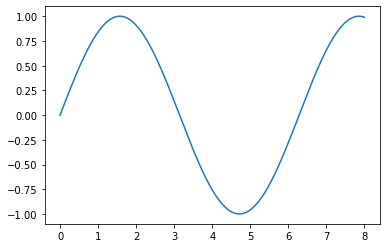

In [80]:
plt.plot(x, sin_x)

Notemos que no fue necesario utilizar `plt.show()` para poder desplegar la figura, dado que estamos trabajando en un **notebook**.

### 2. Gráficos a partir de dataframes

Ahora, ¿qué pasa si queremos hacer gráficos a partir de un DataFrame? Primero, vamos a importar Pandas y cargar un dataset. En este caso vamos a usar *Air Passengers*, que registra el número de pasajeros de una aerolínea en cada mes de un año determinado.

In [81]:
import pandas as pd

from pydataset import data
AirPassengers = data("AirPassengers")

Veamos como se ven los datos:

In [82]:
AirPassengers.head(5)

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


Grafiquemos el tiempo en el eje x y la cantidad de pasajeros en el eje y. Una forma de hacer esto, es armar x e y a partir de los dataframes y graficar como lo habíamos hecho en la sección anterior:

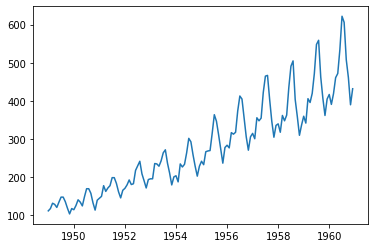

In [83]:
x_pass = AirPassengers["time"]
y_pass = AirPassengers["AirPassengers"]
plt.plot(x_pass, y_pass)

De forma equivalente:

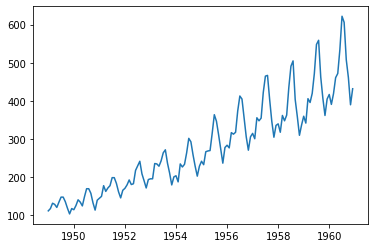

In [84]:
plt.plot(AirPassengers["time"], AirPassengers["AirPassengers"])

Pero también podemos graficar a partir de dataframes de la siguiente forma:

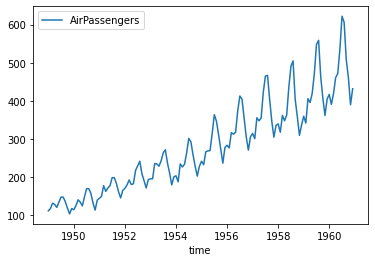

In [85]:
AirPassengers.plot(x="time", y="AirPassengers")

En este caso, aplicamos el método `plot` al dataframe y como parámetros le pasamos los nombres de las columnas.

### 3. Múltiples funciones en un mismo gráfico

Ahora vamos a ver que también es posible tener múltiples funciones en el mismo gráfico. Generemos primero una función exponencial con numpy (de la misma forma en que lo hicimos con `sin(x)`.

In [86]:
# Función exponencial
exp_x = np.exp(x/4)

Ahora grafiquemos ambas funciones:

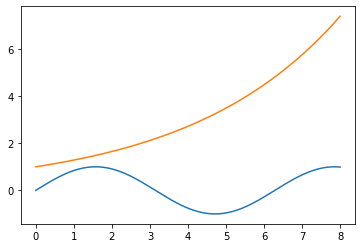

In [87]:
plt.plot(x, sin_x)
plt.plot(x, exp_x)

Hay que tener mucho cuidado al querer desplegar funciones que no se encuentran cercanas, ya que matplotlib intenta ajustar automáticamente:

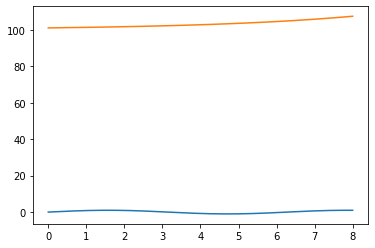

In [88]:
exp_x = np.exp(x/4) + 100
plt.plot(x, sin_x)
plt.plot(x, exp_x)


### 4. Markers, Colores y Linestyle

Un **Marker** es la función que grafica los puntos pasados como parámetros. Puedes encontrar todos los posibles en el siguiente [link](https://matplotlib.org/api/markers_api.html). 

El parámetro `marker` define cuál queremos usar y el parámetro `markersize` o `ms` define su tamaño.

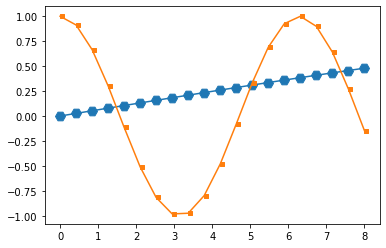

In [89]:
# En este caso generaremos un arreglo con valores entre 0 y 8, con 20 puntos.
x = np.linspace(0, 8, 20)

plt.plot(x, np.sin(x/16), marker = 'H', markersize=10)
plt.plot(x, np.cos(x), marker = '$.$', ms = 8);

Las paletas de **colores** pueden ser encontradas en el siguiente [link](https://matplotlib.org/stable/gallery/color/named_colors.html).

El color se define a través del parámetro `color` o `c`.

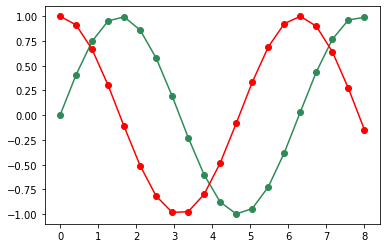

In [90]:
x = np.linspace(0, 8, 20)

# Seleccionamos color seagreen
plt.plot(x, np.sin(x), marker = 'o', color= 'seagreen')
# Seleccionamos color red
plt.plot(x, np.cos(x), marker = 'o', c= 'r')

**Linestyle** es el tipo de línea que se desea desplegar. Puedes encontrar más información en el siguiente [link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D#matplotlib.lines.Line2D.set_linestyle).

El tipo de línea se define con el parámetro `linestyle` o `ls`.

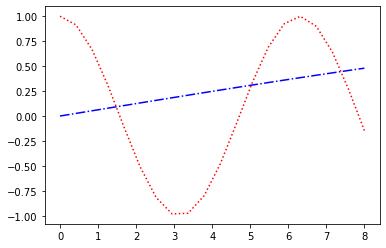

In [91]:
x = np.linspace(0, 8, 20)

plt.plot(x, np.sin(x/16), linestyle= '-.', c= 'b')
plt.plot(x, np.cos(x), ls= ':', c = 'r');

### 5. Figuras, títulos, ejes y leyenda

Para poder manipular nuestro gráfico es importante crear un objeto de tipo `Figure`. Este permite hacer modificaciones al espacio del gráfico.

Text(0, 0.5, 'eje Y')

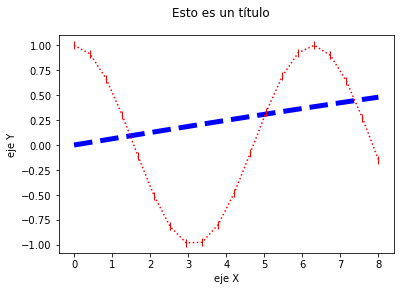

In [92]:
x = np.linspace(0, 8, 20)

# Se debe definir la figura
fig = plt.figure()

# A la figura se le asigna un titulo
fig.suptitle('Esto es un título')

# Hacemos los plot
plt.plot(x, np.sin(x/16), linewidth = 5 ,ls= '--', c= 'b')
plt.plot(x, np.cos(x), ls= ':', marker = "|",ms = 8, c = 'r')

# Definimos los nombres a desplegar de los ejes
plt.xlabel('eje X')
plt.ylabel('eje Y')

También podemos agregar **leyendas**. Para más información podemos ver el siguiente [link.](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

A nuestros gráficos, debemos agregarles el parámetro `label`.

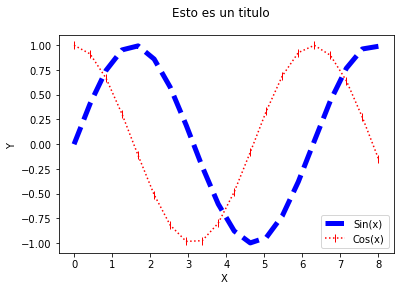

In [93]:
x = np.linspace(0, 8, 20)

# Definimos la figura
fig = plt.figure()

# Agregamos el título
fig.suptitle('Esto es un titulo')

# Hacemos los plots. El parametro Label, nos permite dar la descripción de lo que se está desplegando
plt.plot(x, np.sin(x), linewidth = 5 , ls= '--', c= 'b', label='Sin(x)')
plt.plot(x, np.cos(x), ls= ':', marker = "|", ms = 8, c = 'r', label='Cos(x)')

# Agregamos los nombres de los ejes
plt.xlabel('X ')
plt.ylabel('Y ')

# La función legend despliega los labels de cada plot, como parámetro se le puede entregar la ubicación, por default intenta la mejor posición
plt.legend(loc = 4)

Para editar el **tamaño de una figura** podemos usar el parámetro `figsize`:

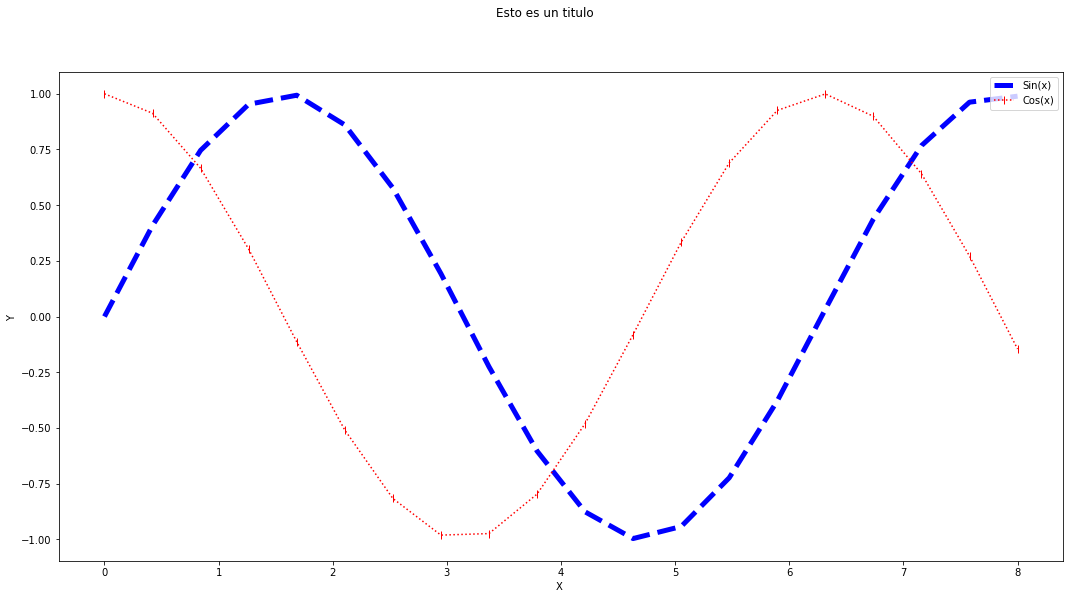

In [94]:
x = np.linspace(0, 8, 20)

# Al generar una figura se le puede modificar su tamaño con el parametro figsize
fig = plt.figure(figsize=(18,9))

# Título
fig.suptitle('Esto es un titulo')

# Gráficos
plt.plot(x, np.sin(x),linewidth = 5 , ls= '--', c= 'b', label='Sin(x)')
plt.plot(x, np.cos(x),ls= ':', marker = "|",ms = 8, c = 'r', label='Cos(x)')

# Ejes
plt.xlabel('X ')
plt.ylabel('Y ')

# Leyenda
plt.legend(loc = 1)


¿Y qué pasa si ahora queremos **guardar la figura**? Para esto hacemos uso del comando `fig.savefig`:

In [95]:
fig.savefig('my_figure.png', facecolor='w')

### 6. Algunos ejemplos de gráficos

Para finalizas, mostraremos unos ejemplos más comunes de graficos ocupados en el proceso de análisis de los datos.

#### **Histograma**

Un histograma es un tipo de gráfico que nos permite visualizar la distribución de una variable numérica utilizando un conjunto de barras. Cada barra representa un rango determinado de valores, y la altura de una barra en particular representa el número de datos en el DataFrame que pertenecen al rango de valores asociados a esa barra.

(array([  2.,   5.,   5.,   7.,  12.,  28.,  31.,  48.,  61.,  86.,  84.,
         93., 107.,  89.,  87.,  66.,  59.,  39.,  35.,  19.,  17.,  10.,
          7.,   3.]),
 array([-3.04614305, -2.8042473 , -2.56235154, -2.32045578, -2.07856003,
        -1.83666427, -1.59476851, -1.35287276, -1.110977  , -0.86908124,
        -0.62718548, -0.38528973, -0.14339397,  0.09850179,  0.34039754,
         0.5822933 ,  0.82418906,  1.06608481,  1.30798057,  1.54987633,
         1.79177209,  2.03366784,  2.2755636 ,  2.51745936,  2.75935511]),
 <a list of 24 Patch objects>)

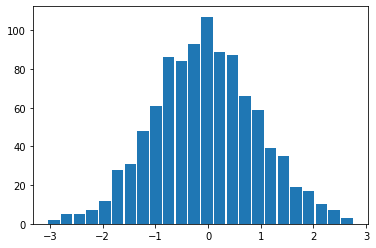

In [96]:
mu = 0 # mean
sigma = 1 # stddev
sample = 1000
np.random.seed(0)
x = np.random.normal(mu, sigma, sample)

# rwidth permite que las barras no estén pegadas
plt.hist(x,bins=24, rwidth=0.9)

#### **Gráfico de barras**
Los gráficos de barra o barplots son uno de los tipos de gráficos más utilizados. Nos permiten mostrar la relación entre una variable numérica y una categórica.

In [97]:
# Cargamos un dataset de pydataset
mtcars = data("mtcars")
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [98]:
# Reemplazamos los 0 y 1 por Automático y Manual respectivamente.
mtcars['am'] = mtcars['am'].map({0:'Automático', 1:'Manual'})
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automático,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automático,3,2


Nos creamos una tabla de frecuencias que contenga la información que queremos graficar. Para esto utilizamos `groupby()`, y contamos cuántos automóviles automáticos y manuales hay.

In [99]:
mtcars_grouped = mtcars['am'].groupby(mtcars["am"]).count()
mtcars_grouped

am
Automático    19
Manual        13
Name: am, dtype: int64

Realizamos nuestro gráfico, para esto usamos `plt.bar`.

<BarContainer object of 2 artists>

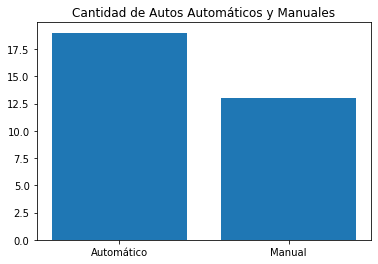

In [100]:
plt.title("Cantidad de Autos Automáticos y Manuales")
plt.bar(mtcars_grouped.keys(), mtcars_grouped)

#### **Scatter plot (o gráfico de puntos)**

Es un tipo de gráfico que usa puntos para representar los valores de dos o más variables numéricas diferentes. En un scatter plot la posición de cada punto en los ejes horizontales y verticales indica los valores que toma un individio en particular.

In [101]:
np.random.seed(2021)

# Generamos datos simulados
n = 100
x = np.random.normal(3, 1, 100)

# Dependencia lineal positiva fuerte 
y = 3*x + np.random.normal(0, 1, 100) + 2

df = pd.DataFrame({"x": x, "y": y})

df.head(5)

,x,y
0,4.488609,14.725253
1,3.676011,13.486266
2,2.581549,11.001893
3,2.193479,8.138733
4,3.555876,13.208963


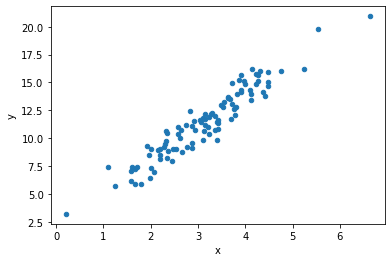

In [102]:
df.plot.scatter(x='x', y='y')

# 7. Resumen

En este tutorial conocimos las herramientas básicas para visualizar a nuestros datos ocupando la librería Mathplotlib.